<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360"/>

# Project ASSIGNMENT - House Price Prediction Model

###  This is a House dataset having 1460 observation and 81 different variables. You have to create a linear regression model using the provided predictor variables for the prediction of sales value of House.


This notebook is going to be focused on solving the problem of predicting house prices for house buyers and house sellers.

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value.

We are going to take advantage of all of the feature variables available to use and use it to analyze and predict house prices.

Client Housebuyer: This client wants to find their next dream home with a reasonable price tag. They have their locations of interest ready. Now, they want to know if the house price matches the house value. With this study, they can understand which features (ex. Number of bathrooms, location, etc.) influence the final price of the house. If all matches, they can ensure that they are getting a fair price.

Client Houseseller: Think of the average house-flipper. This client wants to take advantage of the features that influence a house price the most. They typically want to buy a house at a low price and invest on the features that will give the highest return. For example, buying a house at a good location but small square footage. The client will invest on making rooms at a small cost to get a large return.

## 1. Loading Packages

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

#package to ignore Deprecated warning messages
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 2. Loading and Inspecting Data

In [2]:
#Load the dataset

housedata = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")

housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Shape of data

housedata.shape

(1460, 81)

There are 1460 observation with 81 variables defined.

In [4]:
# info of dataset

housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are total 43 qualitative variables and 38 quantitative variables.

In [5]:
# Describe the dataset

housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We have the house dataset from the year 1872 to 2010 with sale price of minimum of ##dollar 34900 to maximum of 755000##

In [6]:
# Getting info about keys

housedata.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Describing Qualitative and Quantitative columns in dataset

In [7]:
quantitative = [f for f in housedata.columns if housedata.dtypes[f] != 'object']

#removing ID and SalePrice from quantitative

quantitative.remove('SalePrice')
quantitative.remove('Id')

print("quantitative variables are in dataset",len(quantitative))
quantitative




quantitative variables are in dataset 36


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [9]:
qualitative = [f for f in housedata.columns if housedata.dtypes[f] == 'object']
print("qualitative variables are in dataset",len(qualitative))

qualitative


qualitative variables are in dataset 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## 3. Pre-processing of data  - Cleaning

Let us check about our Test Variable (Response Variable) i.e Sale Price based on different predictors.

In [206]:
housedata['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Distribution plot of target variable

Sale Price seems right skewed in the below distribution plot and it would be better to have normal distribution of target variable
to make accurate predicting model. So we use the log method to change the Saleprice.


 mu = 180742.14 and sigma = 79536.82



Text(0.5, 1.0, 'SalePrice distribution')

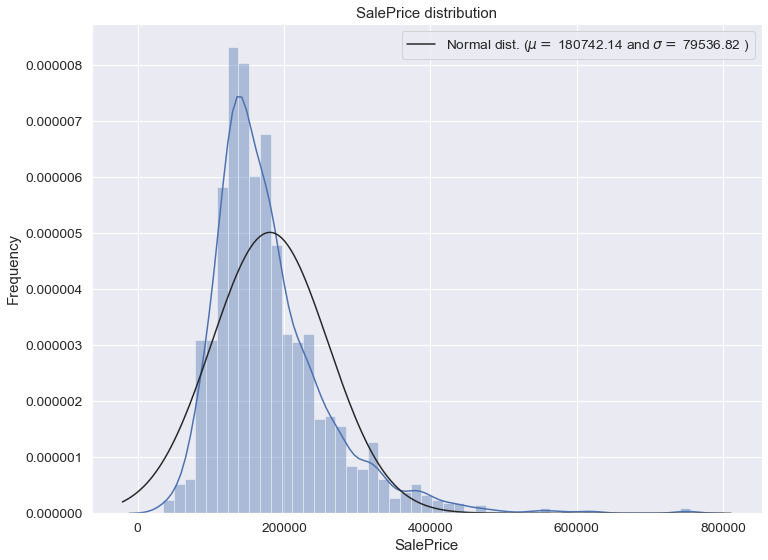

In [302]:
from scipy import stats
f, ax = plt.subplots(figsize=(12, 9))

#Check the new distribution 
sns.distplot(housedata['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(housedata['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


 mu = 12.02 and sigma = 0.40



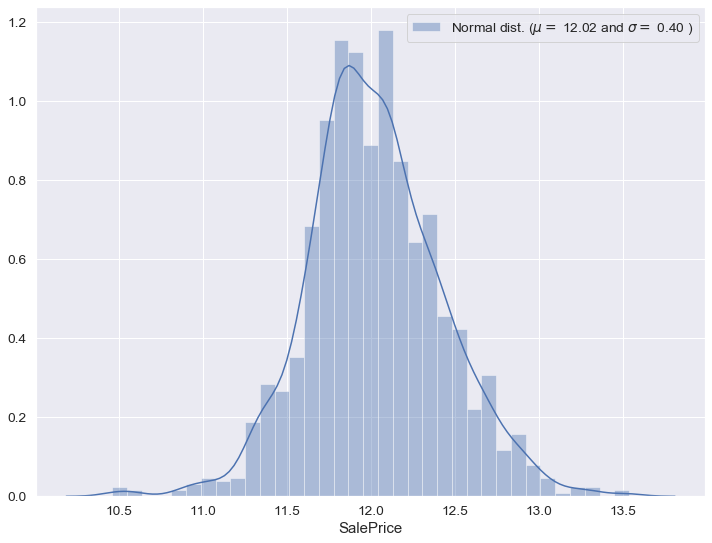

In [310]:
# Transformed SalePrice using log of Sale Price
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(np.log(housedata["SalePrice"]))
(mu, sigma) = stats.norm.fit(np.log(housedata["SalePrice"]))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

In [212]:
# transforming the log Sale Price to have normal distribution values to boost ML model performance.

housedata["TransformedSalePrice"] = np.log(housedata["SalePrice"])

housedata["TransformedSalePrice"] 

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [340]:
# Checking missing values in dataset

#check the missing values in all columns
missingValues = housedata.isnull().sum()

#filter the columns with missing values greater than Zero
missingValues = missingValues[missingValues>0]

#arrange them in descending
missingValues.sort_values(inplace=True,ascending=False)

#Converting in to dataframe
missingValues = missingValues.to_frame()
#assign a column
missingValues.columns = ['count']
missingValues.index.names = ['Name']
missingValues['Name'] = missingValues.index
missingValues['DateType'] = missingValues['Name'].dtypes
missingValues



,count,Name,DateType
Name,,,
PoolQC,1442,PoolQC,object
MiscFeature,1395,MiscFeature,object
Alley,1358,Alley,object
Fence,1168,Fence,object
FireplaceQu,686,FireplaceQu,object
LotFrontage,258,LotFrontage,object
GarageYrBlt,81,GarageYrBlt,object
GarageType,81,GarageType,object
GarageFinish,81,GarageFinish,object


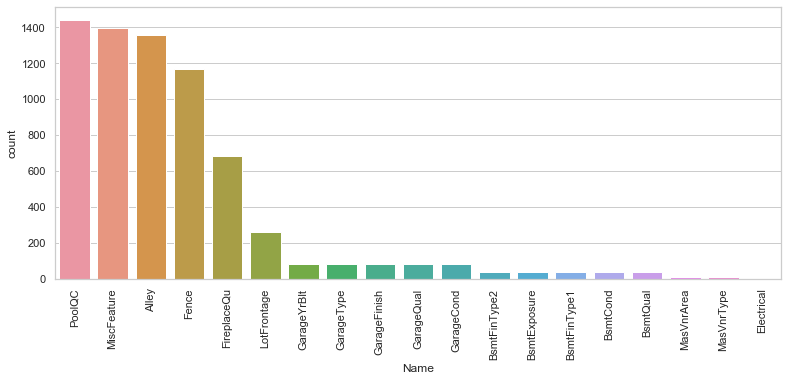

In [341]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name',y='count', data=missingValues)
plt.xticks(rotation = 90)
plt.show()

There are lot of missing or NaN values in LotFrontage,Ally,FireplaceQu,GarageType,Poolrea,Fence,MiscFeatures etc. Before replacing the 
missing values, Let us check out , which are the important variables/columns contribute to Sale Price of House.

Let us do the Co-relation of Sale Price.

## Handling Missing Data

In [159]:
housedata.columns.nunique()

81

With 81 columns its difficult to decide which columns contribute to Sale Price more, so let us create heatmap.

## Feature Selection - Correlation Matrix - Heat Map 

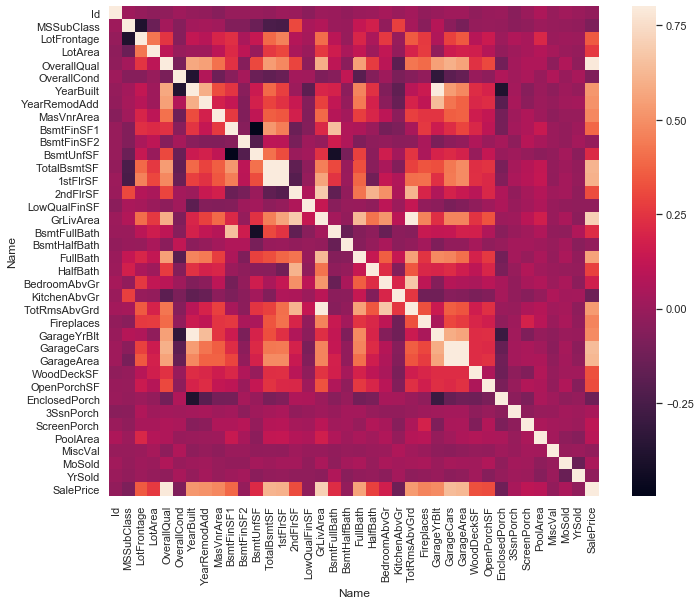

In [175]:
# Correlation Matrix Heatmap

corrmat = housedata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [176]:
#Correlation of SalePrice of House with other variables
correlations = housedata.corr()
correlations = correlations["SalePrice"].sort_values(ascending=False)
correlations

Name
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: S

The above list shows the correlation of SalePrice with other variables in descending order, OverallQual,GrLiveArea,Garagecars,
GarageArea,TotalBsmtSF,1stFlrSF are the influencer contributer to SalePrice of House.

There is negative correlation exists with EnclisedPorch,KitchenAbvGr,MSSubClass,Id,MiscVal. As these are not impacting the Sale Price
of House and can be ommitted.

Selecting the Top 10 independent variables to predict Dependent Sale Price

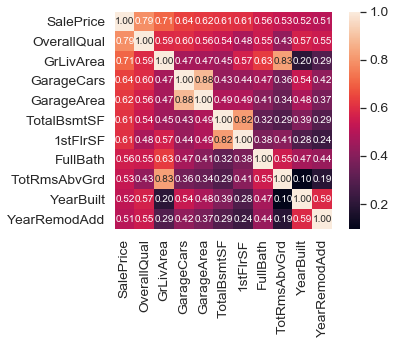

In [188]:
# Top 10 Heatmap
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housedata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

This heatmap dispalys the top 10 features variables relation with SalePrice.

In [187]:
# Displaying the top 10 feature list

features = corrmat.nlargest(11,'SalePrice')['SalePrice'].index
features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object', name='Name')

These are the top 10 feature list for our House Price regression model creation

- __OverallQual__: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
- __GrLivArea__: Above grade (ground) living area square feet
- __GarageCars__: Size of garage in car capacity
- __GarageArea__: Size of garage in square feet
- __TotalBsmtSF__: Total square feet of basement area
- __1stFlrSF__: First Floor square feet
- __FullBath__: Full bathrooms above grade
- __TotRmsAbvGrd__: Total rooms above grade (does not include bathrooms)
- __YearBuilt__ : Original construction date
- __YearRemodAdd__ :Remodel date

## Check for Null or missing values in feature selected.

In [215]:
housedata['OverallQual'].isnull().sum()
housedata['GrLivArea'].isnull().sum()
housedata['GarageCars'].isnull().sum()
housedata['GarageArea'].isnull().sum()
housedata['TotalBsmtSF'].isnull().sum()
housedata['1stFlrSF'].isnull().sum()
housedata['FullBath'].isnull().sum()
housedata['TotRmsAbvGrd'].isnull().sum()
housedata['YearBuilt'].isnull().sum()
housedata['YearRemodAdd'].isnull().sum()

0

Let us Check how each feature related to Sale Price.

## OverallQual Vs SalePrice

The below boxplot shows the positive correlation between Overall quality of the contruction and its Sale Price. As the quality
increases, the price of house also increases, its show the average price of house with overall quality as 10 is approx 4 lac dollars
where as house with overall quality as 8 and 9 has average saleprice of 2.8 to 3.3 lac dollars.

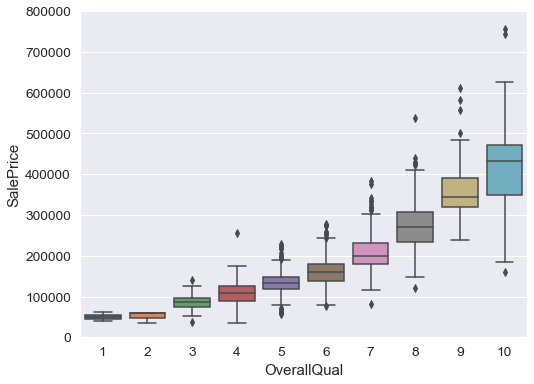

In [205]:
# Overall Quality vs Sale Price
var = 'OverallQual'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

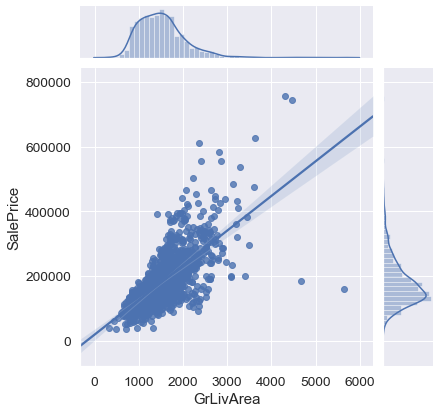

In [222]:
# Living Area Vs SalePrice

var = 'GrLivArea'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['GrLivArea'], y=housedata['SalePrice'], kind='reg')


# Removing Outlier 
There are two data points at the right botton, which means SalePrice decreases with the Living Area greater than 4000 sq. ft.
Let us remove this outlier to improve model performance.

In [228]:
# Removing outliers manually (Two points in the bottom right)
housedata = housedata.drop(housedata[(housedata['GrLivArea']>4000) 
                         & (housedata['SalePrice']<300000)].index).reset_index(drop=True)

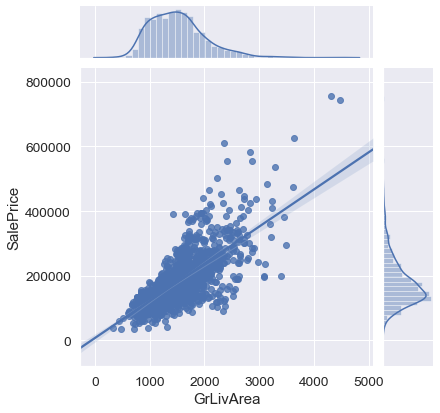

In [230]:
# Living Area Vs SalePrice after removing outlier

var = 'GrLivArea'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['GrLivArea'], y=housedata['SalePrice'], kind='reg')

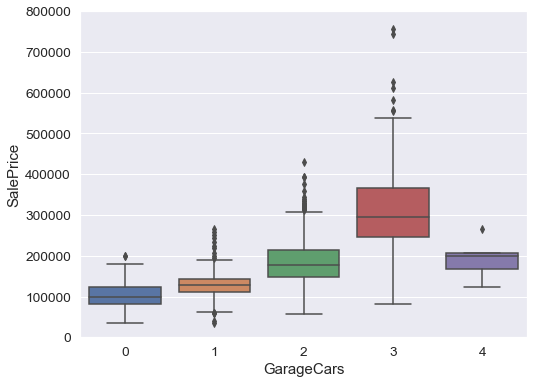

In [225]:
# GarageCars Vs SalePrice
var = 'GarageCars'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [236]:
# Removing outliers manually (house with 4 cars Garage capacity)
housedata = housedata.drop(housedata[(housedata['GarageCars']>3) 
                         & (housedata['SalePrice']<300000)].index).reset_index(drop=True)

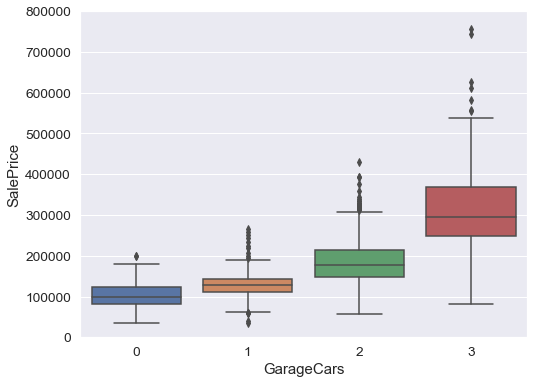

In [237]:
# GarageCars Vs SalePrice after removing outlier
var = 'GarageCars'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

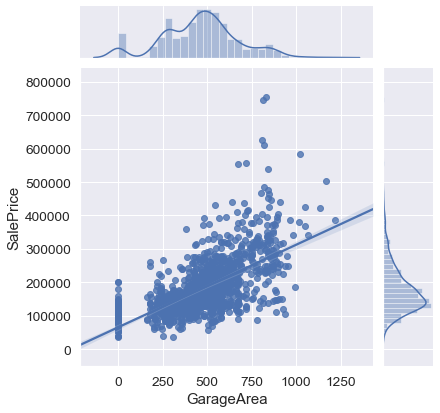

In [242]:
# GarageArea Vs SalePrice

var = 'GarageArea'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['GarageArea'], y=housedata['SalePrice'], kind='reg')

In [240]:
# Removing outliers manually (Bottom two datapoints)
housedata = housedata.drop(housedata[(housedata['GarageArea']>1000) 
                         & (housedata['SalePrice']<300000)].index).reset_index(drop=True)

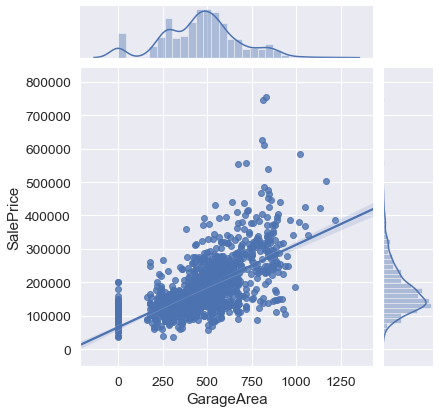

In [241]:
# GarageArea Vs SalePrice

var = 'GarageArea'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['GarageArea'], y=housedata['SalePrice'], kind='reg')

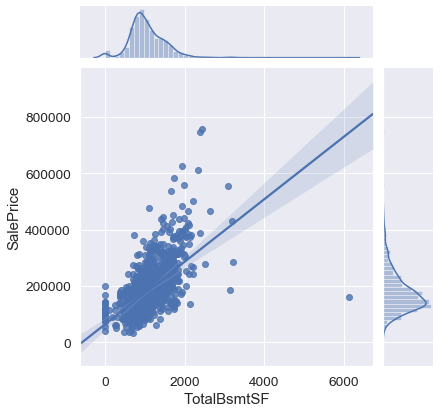

In [227]:
# TotalBsmtSF Vs Sale Price

var = 'TotalBsmtSF'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['TotalBsmtSF'], y=housedata['SalePrice'], kind='reg')

In [246]:
# Removing outliers manually (Bottom one datapoints)
housedata = housedata.drop(housedata[(housedata['TotalBsmtSF']>6000) 
                         & (housedata['SalePrice']<300000)].index).reset_index(drop=True)

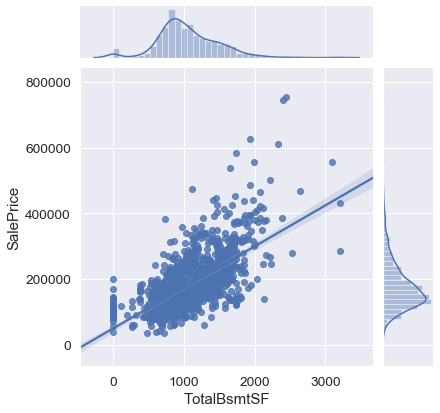

In [244]:
# TotalBsmtSF Vs Sale Price after removing outlier

var = 'TotalBsmtSF'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['TotalBsmtSF'], y=housedata['SalePrice'], kind='reg')

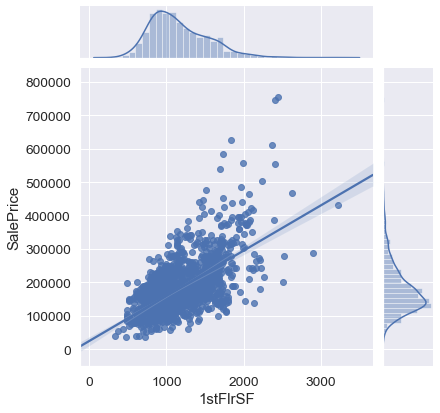

In [245]:
# # 1stFlrSF Vs Sale Price after removing outlier

var = '1stFlrSF'
data = pd.concat([housedata['SalePrice'], housedata[var]], axis=1)
sns.jointplot(x=housedata['1stFlrSF'], y=housedata['SalePrice'], kind='reg')

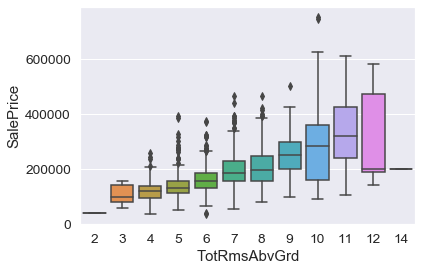

In [247]:
# Total Rooms vs Sale Price
sns.boxplot(x=housedata['TotRmsAbvGrd'], y=housedata['SalePrice'])

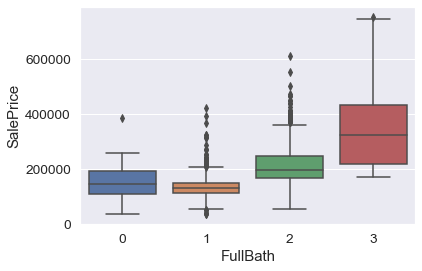

In [248]:
# FullBath vs Sale Price
sns.boxplot(x=housedata['FullBath'], y=housedata['SalePrice'])

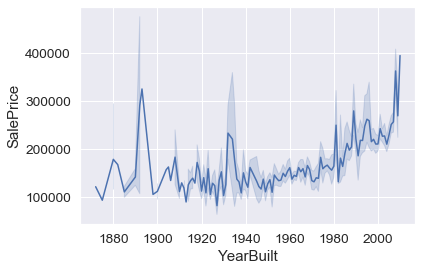

In [251]:
# YearBuilt vs Sale Price
sns.lineplot(x=housedata['YearBuilt'], y=housedata['SalePrice'])

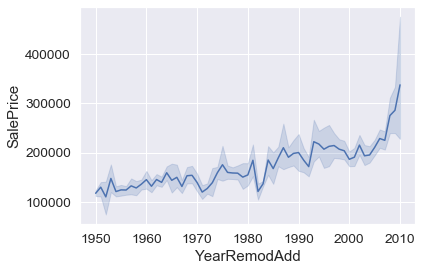

In [252]:
# Remodal vs Sale Price
sns.lineplot(x=housedata['YearRemodAdd'], y=housedata['SalePrice'])

## Modeling and Prediction

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

## Linear Regression

Let us create Linear Regression Model

### Defining the Training and Testing dataset

In our dataset, TransformedSalePrice would be our __Target Variable__ or predictor y and in rests of the dataset, we eliminate
Id,Saleprice,TransformedSalePrice from housedata to make it X dataset or the independent variable set.


In [286]:
X_train = pd.DataFrame([housedata['OverallQual'],housedata['GrLivArea'],housedata['GarageCars'],housedata['GarageArea'],
                      housedata['TotalBsmtSF'],housedata['1stFlrSF'],housedata['FullBath'],housedata['TotRmsAbvGrd'],
                      housedata['YearBuilt'],housedata['YearRemodAdd']])
X_train=X_train.transpose()
y_train = housedata["SalePrice"].values
#X_test = housedata.drop("Id", axis=1).values

X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
5,5,1362,2,480,796,796,1,5,1993,1995
6,8,1694,2,636,1686,1694,2,7,2004,2005
7,7,2090,2,484,1107,1107,2,7,1973,1973
8,7,1774,2,468,952,1022,2,8,1931,1950
9,5,1077,1,205,991,1077,1,5,1939,1950


### Splitting into Validation data

In [287]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

## Linear Regression GridSearchCV

In [288]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_train, y_train)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
Best Score: 0.807315842287158


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


In [289]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_train, y_train)
lin_pred = linreg.predict(X_test)
lin_pred

r2_lin = r2_score(y_test, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_test, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.842791307890455
RMSE Score: 32184.109485139717


In [290]:
scores_lin = cross_val_score(linreg, X_train, y_train, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)*100))

Cross Validation Score: 80.11168670993062


## Random Forest

In [291]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [292]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [293]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  88.54308503204462


## GradientBoostingRegressor

In [294]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [295]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [296]:
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  90.75067657771551
